In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(16, activation = 'relu', name = 'layer_1'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax'),
                    Softmax()
])

In [4]:
# Print the model summary

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.metrics import Accuracy

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu',input_shape=(28,28,1), data_format='channels_last'),
    MaxPooling2D((3,3), data_format='channels_last'),
    Flatten(),
    Dense(10,activation='softmax')
])


In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy','mae'])  


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)  # Note, in TF2.6 you can not access the metrics (like in the demo) until the model is trained.  Returns an empty list.


sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.

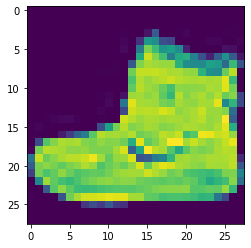

label: Ankle boot


In [15]:
# Display one of the images
i=0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [16]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 15s 59ms/step - loss: 0.8752 - accuracy: 0.7223 - mae: 4.4200
Epoch 2/8
235/235 [==============================] - 14s 59ms/step - loss: 0.5093 - accuracy: 0.8185 - mae: 4.4200
Epoch 3/8
235/235 [==============================] - 14s 59ms/step - loss: 0.4542 - accuracy: 0.8405 - mae: 4.4200
Epoch 4/8
235/235 [==============================] - 14s 59ms/step - loss: 0.4250 - accuracy: 0.8505 - mae: 4.4200
Epoch 5/8
235/235 [==============================] - 14s 59ms/step - loss: 0.4069 - accuracy: 0.8581 - mae: 4.4200
Epoch 6/8
235/235 [==============================] - 14s 59ms/step - loss: 0.3912 - accuracy: 0.8610 - mae: 4.4200
Epoch 7/8
235/235 [==============================] - 14s 59ms/step - loss: 0.3805 - accuracy: 0.8663 - mae: 4.4200
Epoch 8/8
235/235 [==============================] - 14s 59ms/step - loss: 0.3705 - accuracy: 0.8700 - mae: 4.4200


#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.875184,0.722267,4.419999
1,0.509287,0.818517,4.420001
2,0.454199,0.840467,4.420000
3,0.424999,0.850500,4.420001
4,0.406875,0.858117,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

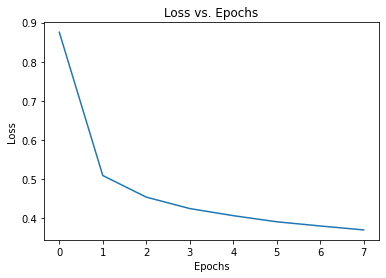

In [18]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

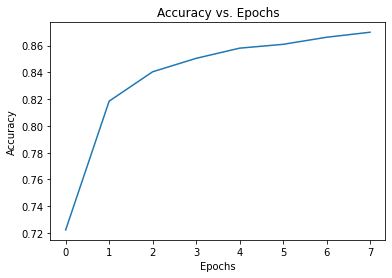

In [19]:
# Make a plot for the accuracy
loss_plot = df.plot(y="accuracy", title = "Accuracy vs. Epochs", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel="Accuracy")


[Text(0, 0.5, 'Mae'), Text(0.5, 0, 'Epochs')]

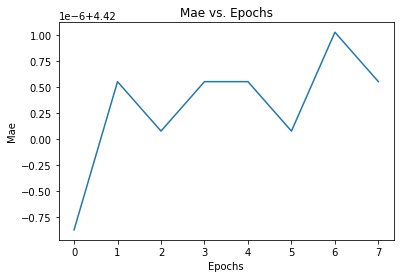

In [20]:
# Make a plot for the additional metric
loss_plot = df.plot(y="mae", title = "Mae vs. Epochs", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel="Mae")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [26]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)


313/313 - 1s - loss: 95.1255 - accuracy: 0.7791 - mae: 4.4200


#### Make predictions from the model

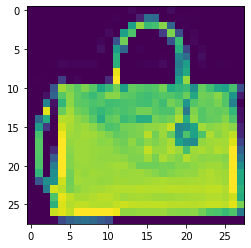

Label: Bag


In [28]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx =30
#test_image = test_images[random_inx]
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
#print(f"Label: {labels[test_labels[random_inx]]}")
print(f"Label: {labels[test_labels[inx]]}")

In [31]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction:{labels[np.argmax(predictions)]}")


Model prediction:Bag
